In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cd = pd.read_csv("Company_Data.csv")
df_cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df_cd.shape

(400, 11)

In [4]:
df_cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df_cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
df_cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df_cd.insert(11,"Sales_Category",'')

In [8]:
df_cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,


In [9]:
for i in range (0,len(df_cd['Sales'])):
    if df_cd['Sales'][i]>=0 and df_cd['Sales'][i]<=6:
        df_cd['Sales_Category'][i]='Low'
    elif df_cd['Sales'][i]> 6 and df_cd['Sales'][i]<=9:
        df_cd['Sales_Category'][i]='Medium'
    elif df_cd['Sales'][i]> 9:
        df_cd['Sales_Category'][i]='High'

In [10]:
df_cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


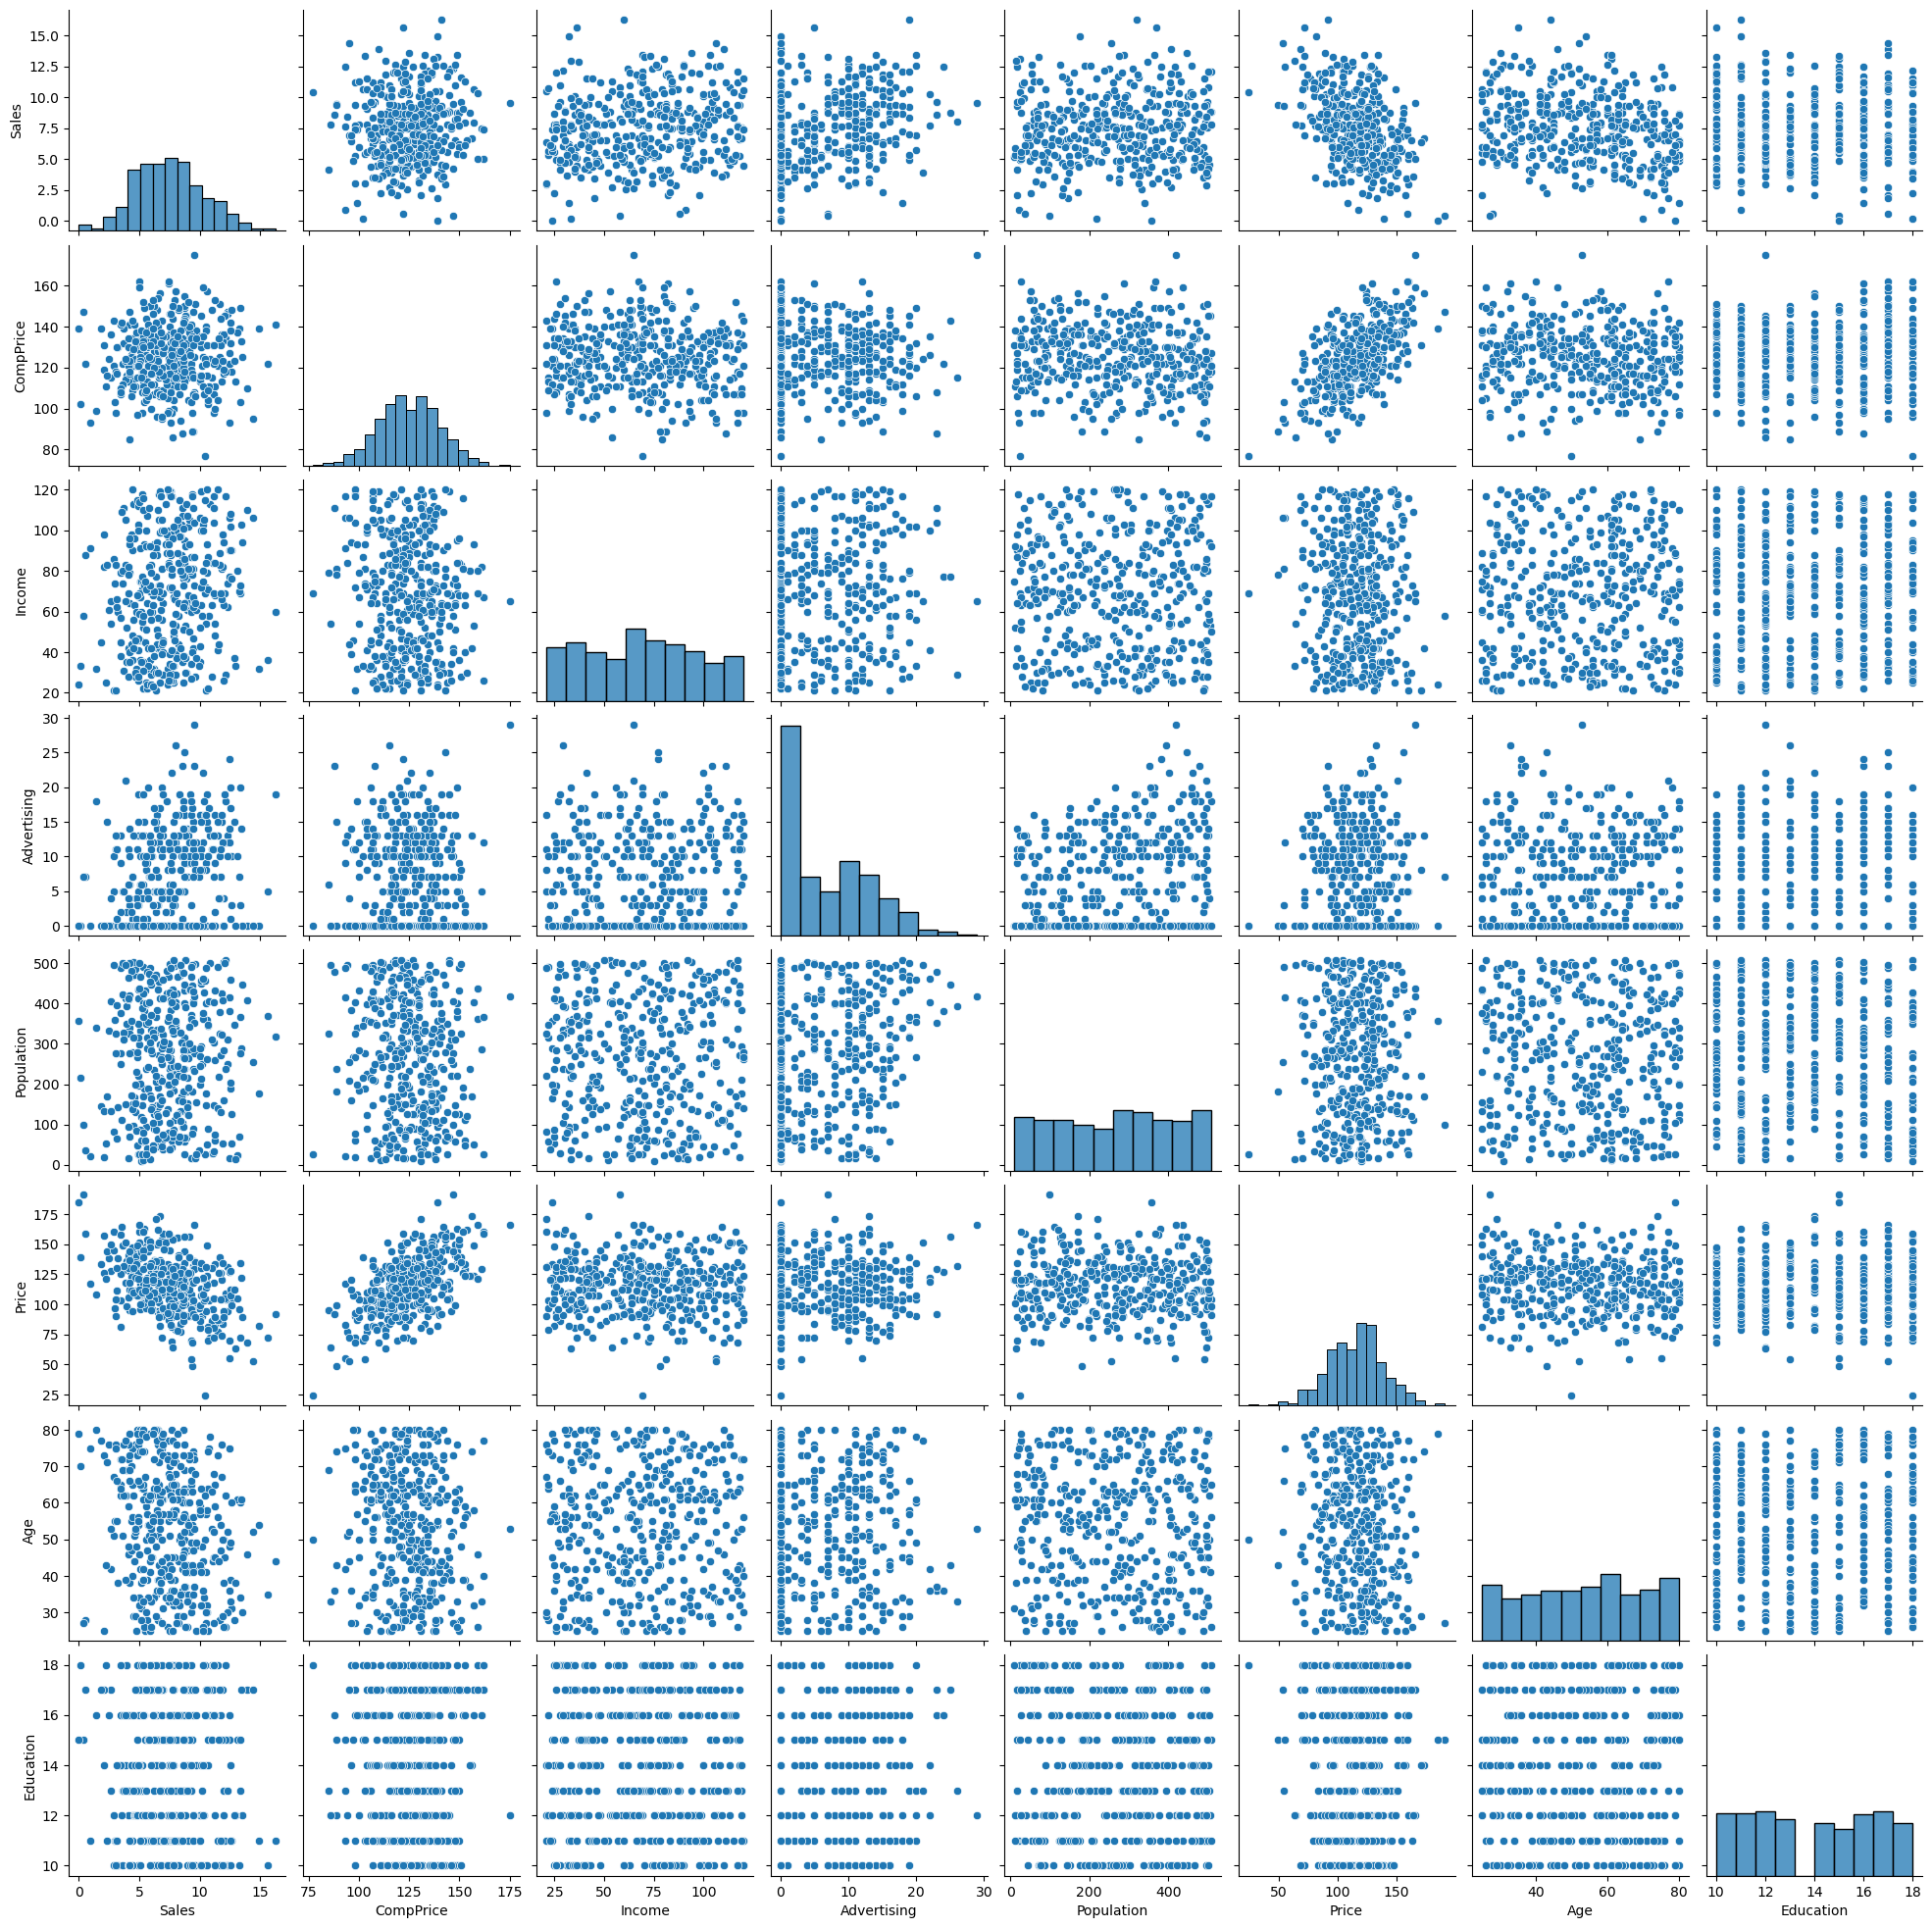

In [11]:
sns.pairplot(df_cd)

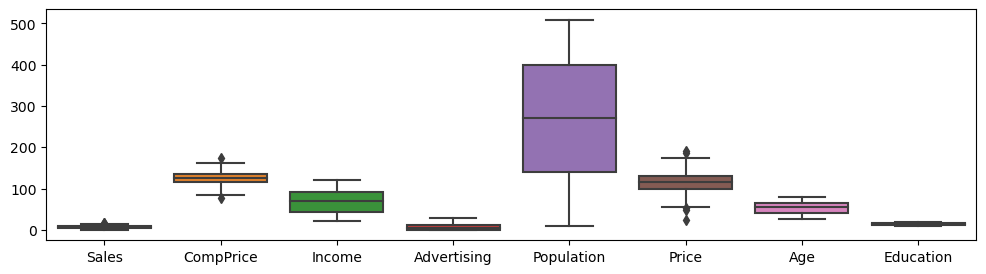

In [12]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_cd)
plt.show()

From above boxplot we can see that population and income columns normally distributed, Sales, CompPrice and Price columns have some outliers.

In [13]:
Q1 = df_cd.quantile(0.25)
Q3 = df_cd.quantile(0.75)
IQR = Q3 - Q1
df_cd = df_cd[~((df_cd < (Q1 - 1.5 * IQR)) | (df_cd > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cd.shape

(392, 12)

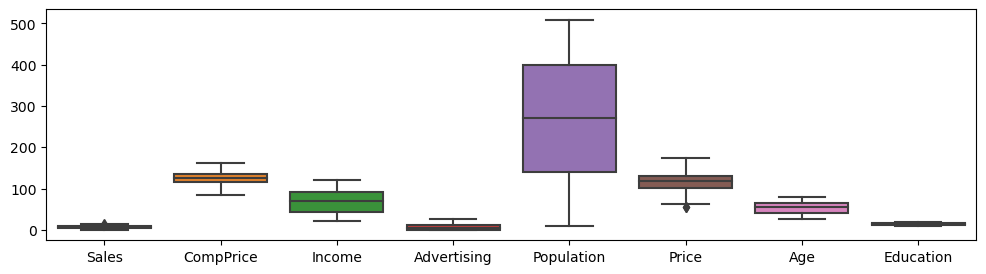

In [14]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_cd)
plt.show()

In [15]:
LE = preprocessing.LabelEncoder()
obj = ['ShelveLoc','Urban','US','Sales_Category']
df_cd[obj] = df_cd[obj].apply(LE.fit_transform)

In [16]:
df_cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [17]:
x = df_cd.iloc[:,1:-1]
y = df_cd.iloc[:,-1]

<h3> Building Model Random Forest Classification </h3>

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 140
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

RandomForestClassifier(max_features=6, max_samples=0.8, n_estimators=140,
                       random_state=8)

In [19]:
pred = model.predict(x_test)

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.79      0.67      0.72        39
           2       0.60      0.70      0.65        37

    accuracy                           0.71        98
   macro avg       0.74      0.73      0.73        98
weighted avg       0.73      0.71      0.72        98



In [21]:
results = cross_val_score(model, x_train, y_train, cv=10)
print(results)
print(round(results.mean(),3))

[0.66666667 0.53333333 0.7        0.63333333 0.65517241 0.51724138
 0.65517241 0.4137931  0.65517241 0.65517241]
0.609


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 170
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

RandomForestClassifier(max_features=6, max_samples=0.8, n_estimators=170,
                       random_state=8)

In [23]:
pred = model.predict(x_test)

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.78      0.64      0.70        39
           2       0.59      0.70      0.64        37

    accuracy                           0.70        98
   macro avg       0.73      0.72      0.72        98
weighted avg       0.72      0.70      0.71        98



In [25]:
results = cross_val_score(model, x_train, y_train, cv=10)
print(results)
print(round(results.mean(),3))

[0.7        0.6        0.63333333 0.63333333 0.5862069  0.51724138
 0.65517241 0.4137931  0.62068966 0.62068966]
0.598
